# Credit Card Fraud Detection

In [ ]:
!gdown --id 1u-5FohzQvhw8JEYCrBQd4DP3_P3YuC_R
!gdown --id 1Fx-xrHKJ8RWN-IzUsN5MWv-B0YTVEgGQ



Downloading...
From: https://drive.google.com/uc?id=1u-5FohzQvhw8JEYCrBQd4DP3_P3YuC_R
To: /content/previous_application.csv.zip
80.0MB [00:00, 104MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Fx-xrHKJ8RWN-IzUsN5MWv-B0YTVEgGQ
To: /content/application_data.csv.zip
37.8MB [00:00, 81.3MB/s]


In [ ]:
!unzip application_data.csv.zip
!unzip previous_application.csv.zip

Archive:  application_data.csv.zip
  inflating: application_data.csv    
Archive:  previous_application.csv.zip
  inflating: previous_application.csv  


In [ ]:
!rm -rf application_data.csv.zip
!rm -rf previous_application.csv.zip
!rm -rf sample_data

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
##from xgboost import XGBClassifier
##from lightgbm import LGBMClassifier  
##from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
##from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## application_data.csv  

In [ ]:
data = pd.read_csv('application_data.csv')

In [ ]:
data1 = data.copy()

In [ ]:
data.head()

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

In [ ]:
data.shape

(307511, 122)

In [ ]:
## previous_application.csv

In [ ]:
p_data = pd.read_csv('previous_application.csv')

In [ ]:
p_data1 = p_data.copy()

In [ ]:
p_data.head()

SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877  ...            -37.0                        0.0
1     2802425      108129  ...         365243.0                        1.0
2     2523466      122040  ...         365243.0                        1.0
3     2819243      176158  ...           -177.0                        1.0
4     1784265      202054  ...              NaN                        NaN

[5 rows x 37 columns]

In [ ]:
p_data.shape

(1670214, 37)

In [ ]:
p_data.loc[p_data['SK_ID_CURR'] == 100002]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
892077     1038818      100002     Consumer loans     9251.775   

        AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
892077         179055.0    179055.0               0.0         179055.0   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
892077                   SATURDAY                        9  ...   

       NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
892077      Auto technology         24.0        low_normal   

            PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
892077  POS other with interest            365243.0         -565.0   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
892077                     125.0          -25.0            -17.0   

       NFLAG_INSURED_ON_APPROVAL  
892077                       0.0  

[1 rows x 37 columns]

In [ ]:
len(pd.unique(p_data['SK_ID_CURR']))

338857

In [ ]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
data = reduce_mem_usage(data)
p_data = reduce_mem_usage(p_data)

data1 = reduce_mem_usage(data1)
p_data1 = reduce_mem_usage(p_data1)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%
Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


In [ ]:
## Label Encoding
le = LabelEncoder()
data['NAME_CONTRACT_TYPE'] = le.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER'] = le.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = le.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = le.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE'] = le.fit_transform(data['NAME_TYPE_SUITE'].astype(str))
data['NAME_INCOME_TYPE'] = le.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = le.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = le.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = le.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE'] = le.fit_transform(data['OCCUPATION_TYPE'].astype(str))
data['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE'] = le.fit_transform(data['ORGANIZATION_TYPE'])
data['FONDKAPREMONT_MODE'] = le.fit_transform(data['FONDKAPREMONT_MODE'].astype(str))
data['HOUSETYPE_MODE'] = le.fit_transform(data['HOUSETYPE_MODE'].astype(str))
data['WALLSMATERIAL_MODE'] = le.fit_transform(data['WALLSMATERIAL_MODE'].astype(str))
data['EMERGENCYSTATE_MODE'] = le.fit_transform(data['EMERGENCYSTATE_MODE'].astype(str))

In [ ]:
## Missing Value Detection

def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)


In [ ]:
missing(data)

In [ ]:
## Descriptive Statistics
data1[['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']].describe(include=['O'])

NAME_TYPE_SUITE NAME_INCOME_TYPE  ... FLAG_OWN_CAR FLAG_OWN_REALTY
count           306219           307511  ...       307511          307511
unique               7                8  ...            2               2
top      Unaccompanied          Working  ...            N               Y
freq            248526           158774  ...       202924          213312

[4 rows x 8 columns]

In [ ]:
data.head()

SK_ID_CURR  TARGET  ...  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                        0.0                         1.0
1      100003       0  ...                        0.0                         0.0
2      100004       0  ...                        0.0                         0.0
3      100006       0  ...                        NaN                         NaN
4      100007       0  ...                        0.0                         0.0

[5 rows x 122 columns]

In [ ]:
data1.head()

AMT_INCOME_TOTAL  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0          202500.0  ...                         1.0
1          270000.0  ...                         0.0
2           67500.0  ...                         0.0
3          135000.0  ...                         0.0
4          121500.0  ...                         0.0

[5 rows x 65 columns]

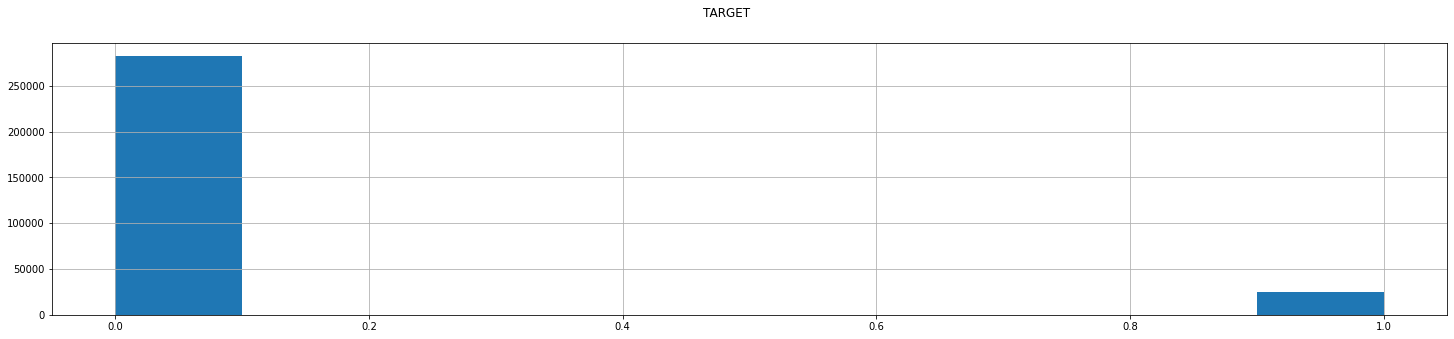

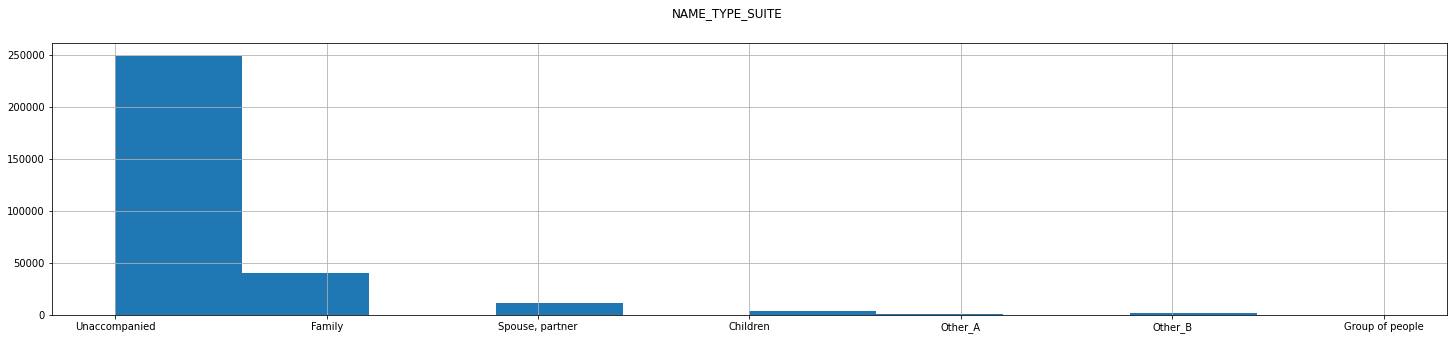

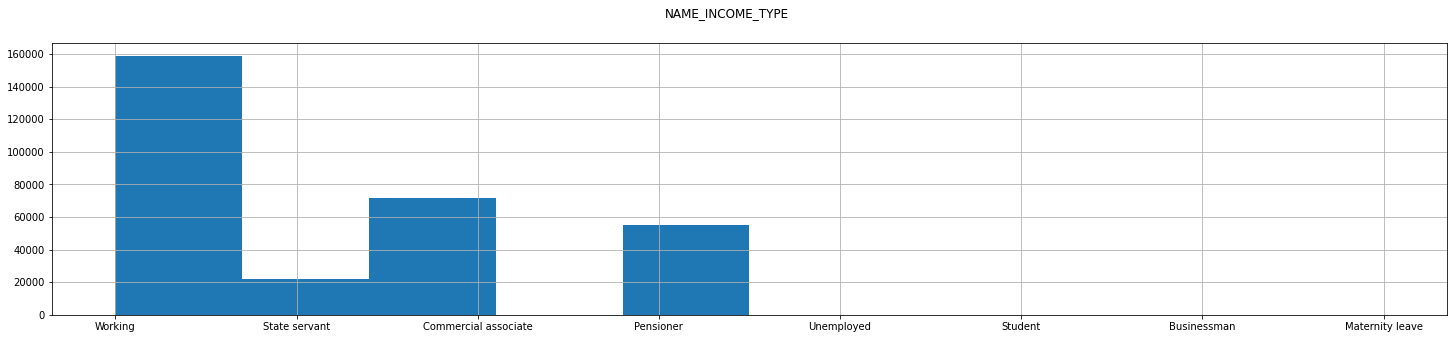

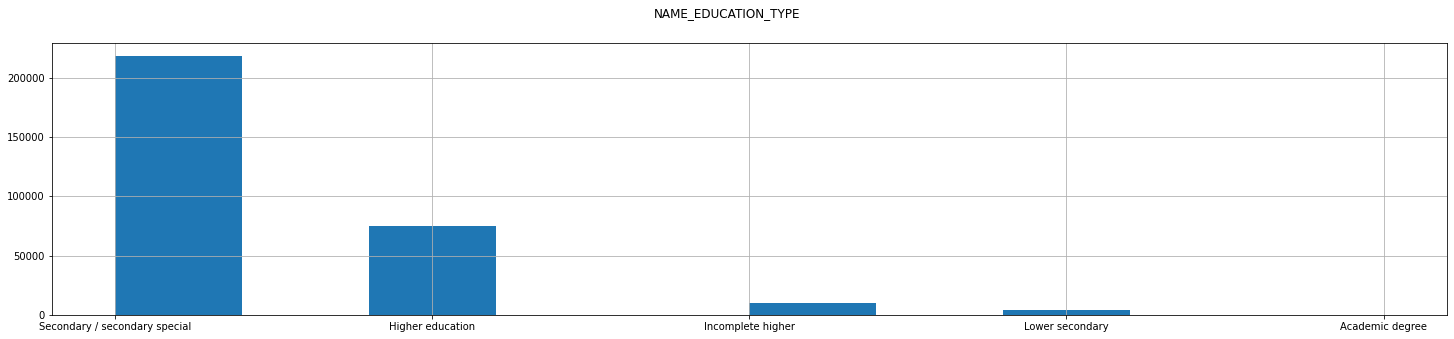

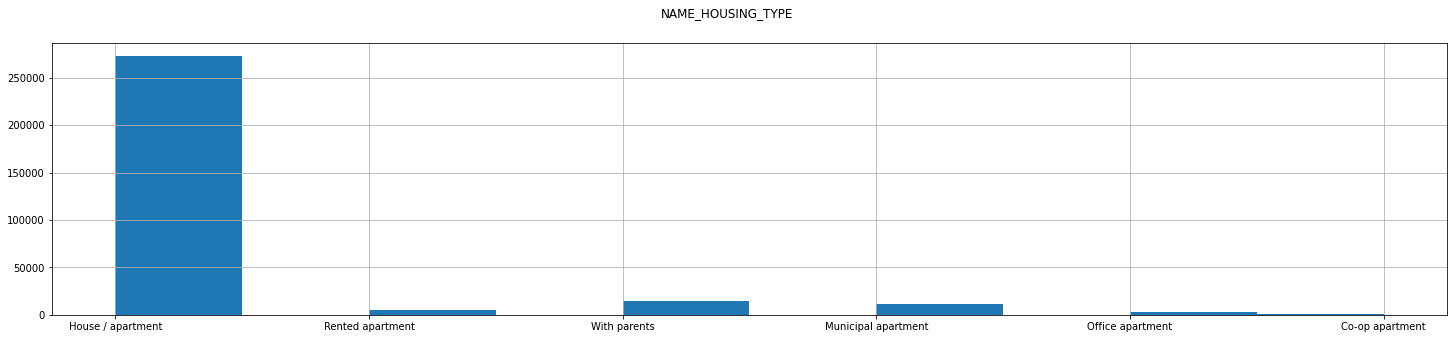

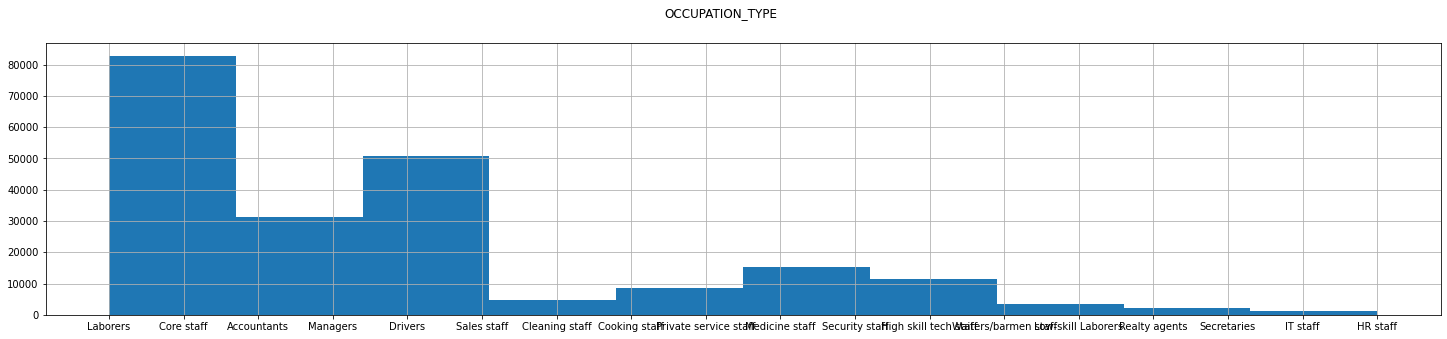

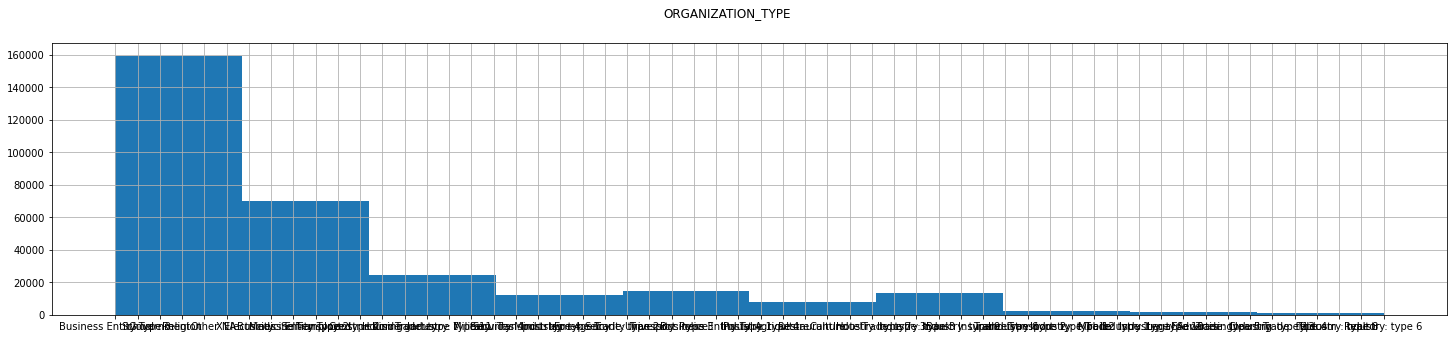

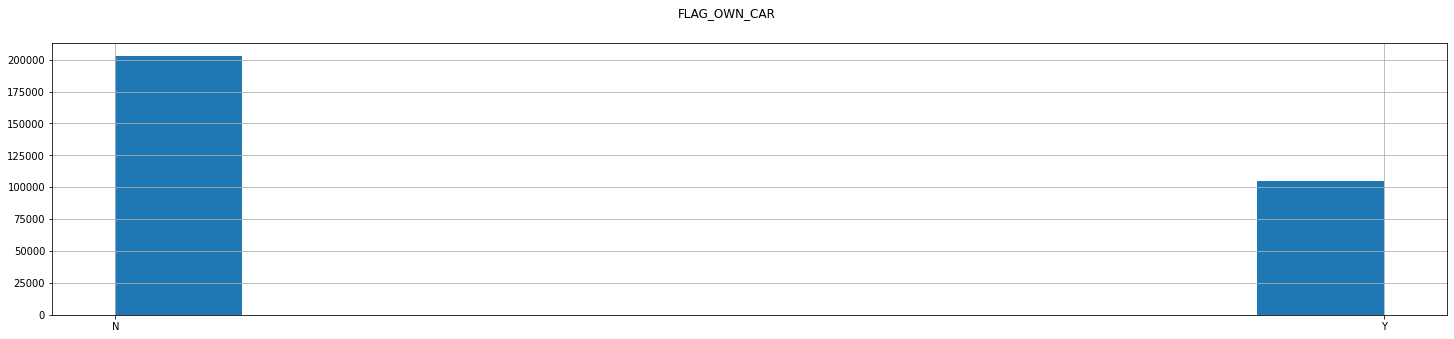

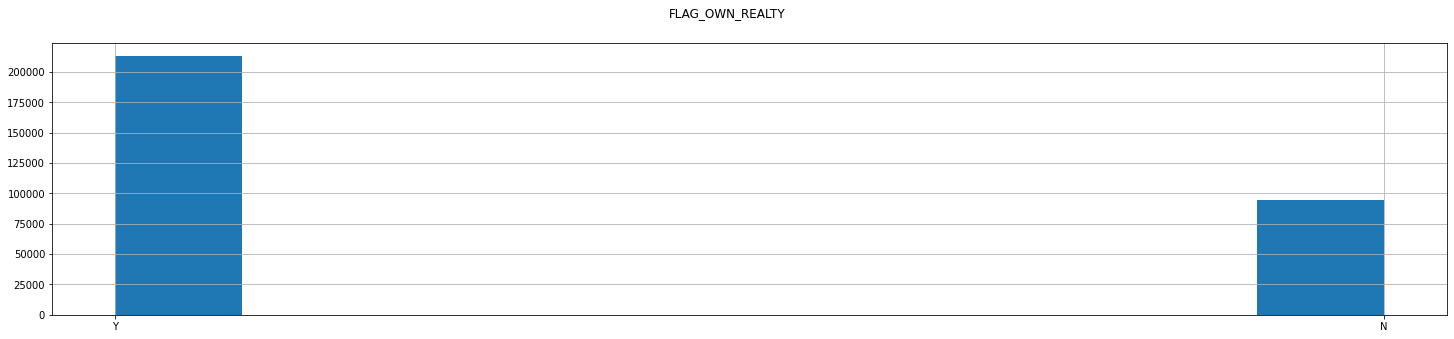

In [ ]:
variables = ['TARGET','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for x in variables:
  data1[x].hist(figsize=(25,5))
  plt.suptitle(x)
  plt.show()
#data1.hist(column=['NAME_INCOME_TYPE'],sharex=True)

#'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE'

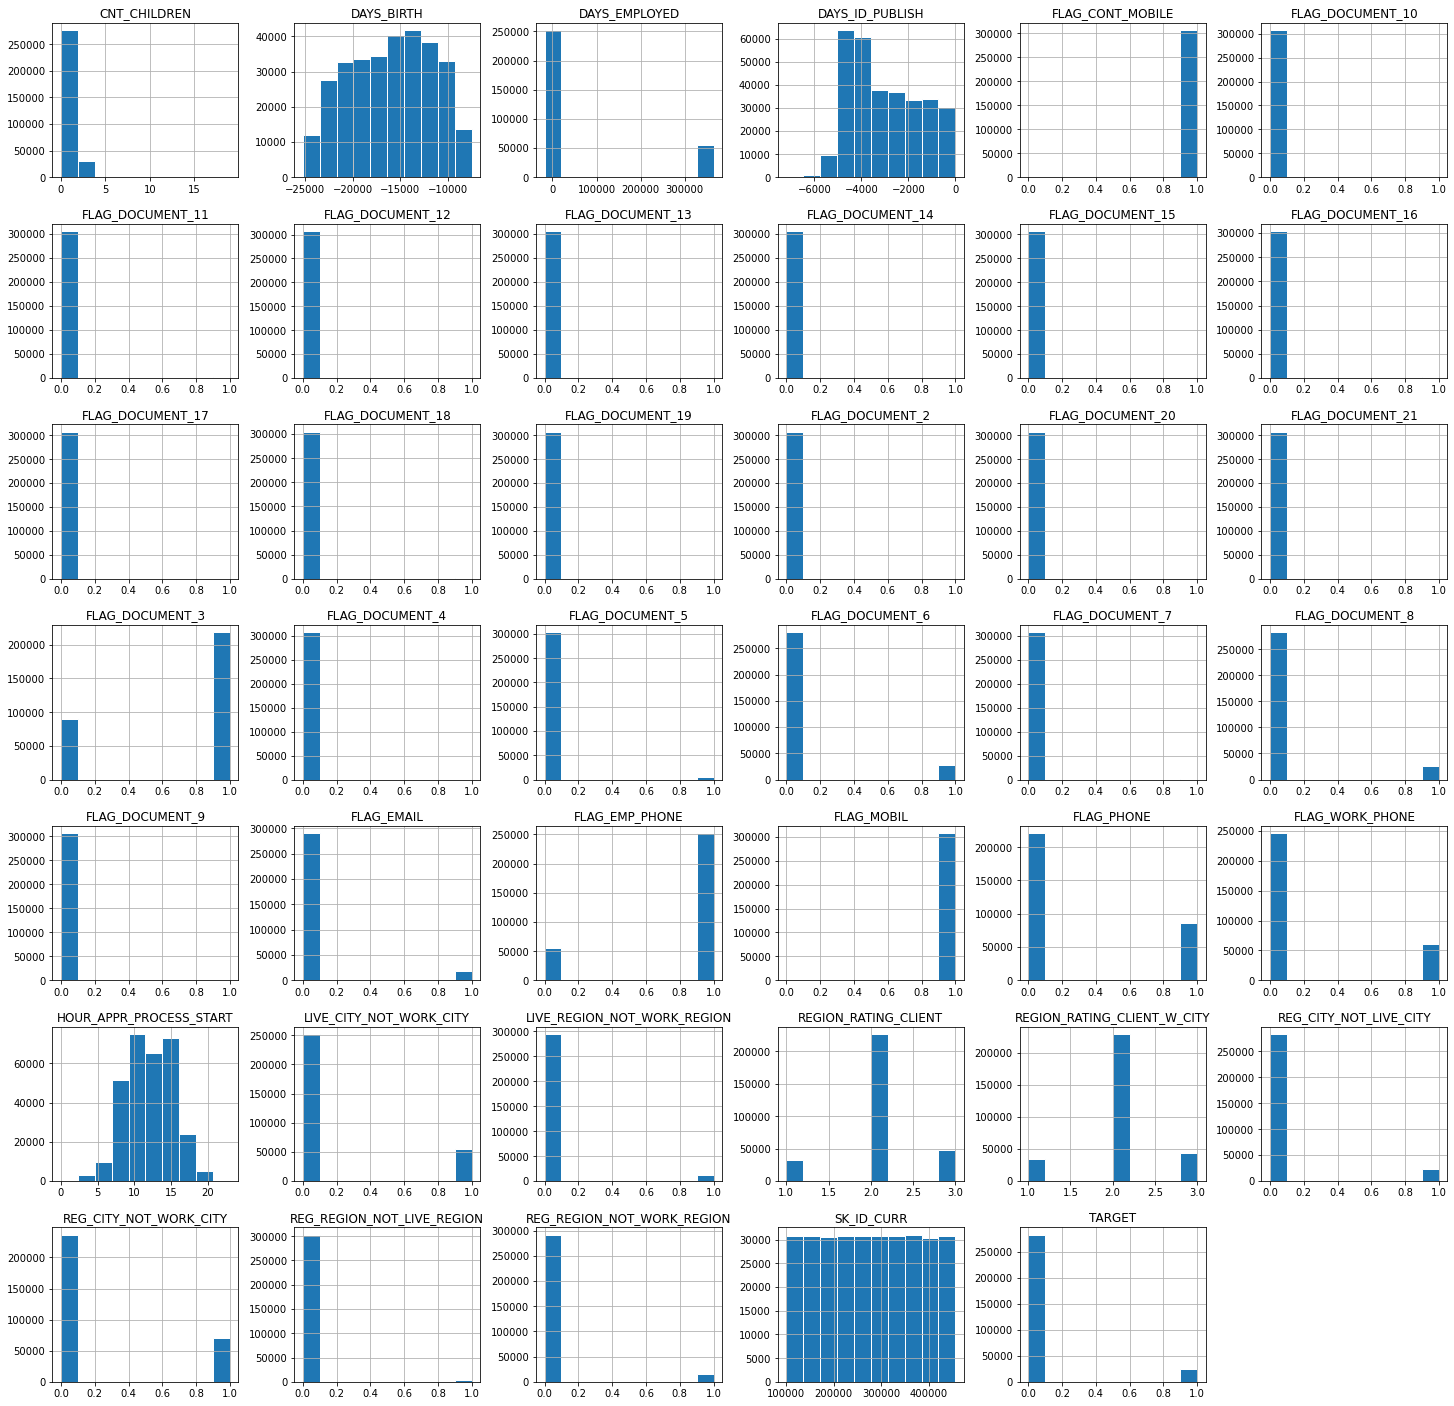

In [ ]:
##Checking Distribution of variables using Histogram
data1.select_dtypes('int').hist(figsize=(25,25), ec='w')
plt.show()

In [ ]:
##Relation Between Variables
def colorcov_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
def color_(value):
    if value <= -0.8 and value >=-1:
        color = '#991f00'
    elif value < -0.3 and -0.8 < value :
        color = '#ff3300'
    elif value < 0 and -0.3 <= value :
        color = '#ff9980'
    elif value == 1 :
        color = 'blue'
    elif value > 0 and value <= 0.3:
        color = '#75f075'
    elif value > 0.3 and value < 0.8:
        color = '#1de71d'
    else:
      color = '#0f8a0f'
    return 'color: %s' % color

In [ ]:
##Descriptive Statistics
#data1.select_dtypes('float').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count         3.075110e+05  3.075110e+05  3.075110e+05     3.075110e+05   
min           2.565000e+04  4.500000e+04  1.615500e+03     4.050000e+04   
max           1.170000e+08  4.050000e+06  2.580255e+05     4.050000e+06   
mad           6.622635e+04  3.165837e+05  1.097530e+04     2.884883e+05   
mean          1.687979e+05  5.990260e+05  2.710871e+04     5.383604e+05   
median        1.471500e+05  5.135310e+05  2.490300e+04     4.500000e+05   
quantile      1.471500e+05  5.135310e+05  2.490300e+04     4.500000e+05   
kurt          1.917866e+05  1.934041e+00  7.707404e+00     2.433643e+00   
skew          3.915597e+02  1.234778e+00  1.579753e+00     1.349216e+00   
var           5.622739e+10  1.619988e+11  2.100630e+08     1.364210e+11   
std           2.371231e+05  4.024908e+05  1.449355e+04     3.693521e+05   

          REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
count                  307511.000000       3.075110e+05    307511.000000   
min                         0.000290      -2.467200e+04         1.000000   
max                         0.072508       0.000000e+00        20.000000   
mad                         0.010291       2.915440e+03         0.665868   
mean                        0.020868      -4.986120e+03         2.152666   
median                      0.018850      -4.504000e+03         2.000000   
quantile                    0.018850      -4.504000e+03         2.000000   
kurt                        3.260065      -3.213466e-01         2.802005   
skew                        1.488009      -5.908716e-01         0.987543   
var                         0.000191       1.241073e+07         0.829336   
std                         0.013831       3.522886e+03         0.910679   

           EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  ...  \
count     307511.000000  3.075110e+05  307511.000000  ...   
min            0.014568  8.173617e-08       0.000527  ...   
max            0.962693  8.549997e-01       0.896010  ...   
mad            0.152637  1.570596e-01       0.153255  ...   
mean           0.502585  5.144101e-01       0.511090  ...   
median         0.505755  5.658970e-01       0.531686  ...   
quantile       0.505755  5.658970e-01       0.531686  ...   
kurt          -0.706626 -2.672418e-01      -0.541585  ...   
skew          -0.069806 -7.937717e-01      -0.409159  ...   
var            0.033811  3.646363e-02       0.034387  ...   
std            0.183877  1.909545e-01       0.185438  ...   

          DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count                307511.000000             307511.000000   
min                       0.000000                  0.000000   
max                      34.000000                344.000000   
mad                       0.253828                  1.637886   
mean                      0.143411                  1.405364   
median                    0.000000                  0.000000   
quantile                  0.000000                  0.000000   
kurt                    126.293777               1409.968649   
skew                      5.182534                 12.064497   
var                       0.199237                  5.653536   
std                       0.446359                  2.377717   

          DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count                307511.000000           307511.000000   
min                       0.000000            -4292.000000   
max                      24.000000                0.000000   
mad                       0.183205              696.277258   
mean                      0.100034             -962.861007   
median                    0.000000             -757.000000   
quantile                  0.000000             -757.000000   
kurt                     86.561590               -0.308589   
skew                      5.277539               -0.713598   
var                       0.131054           683611.564356   
std         

In [ ]:
variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE','OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'] 

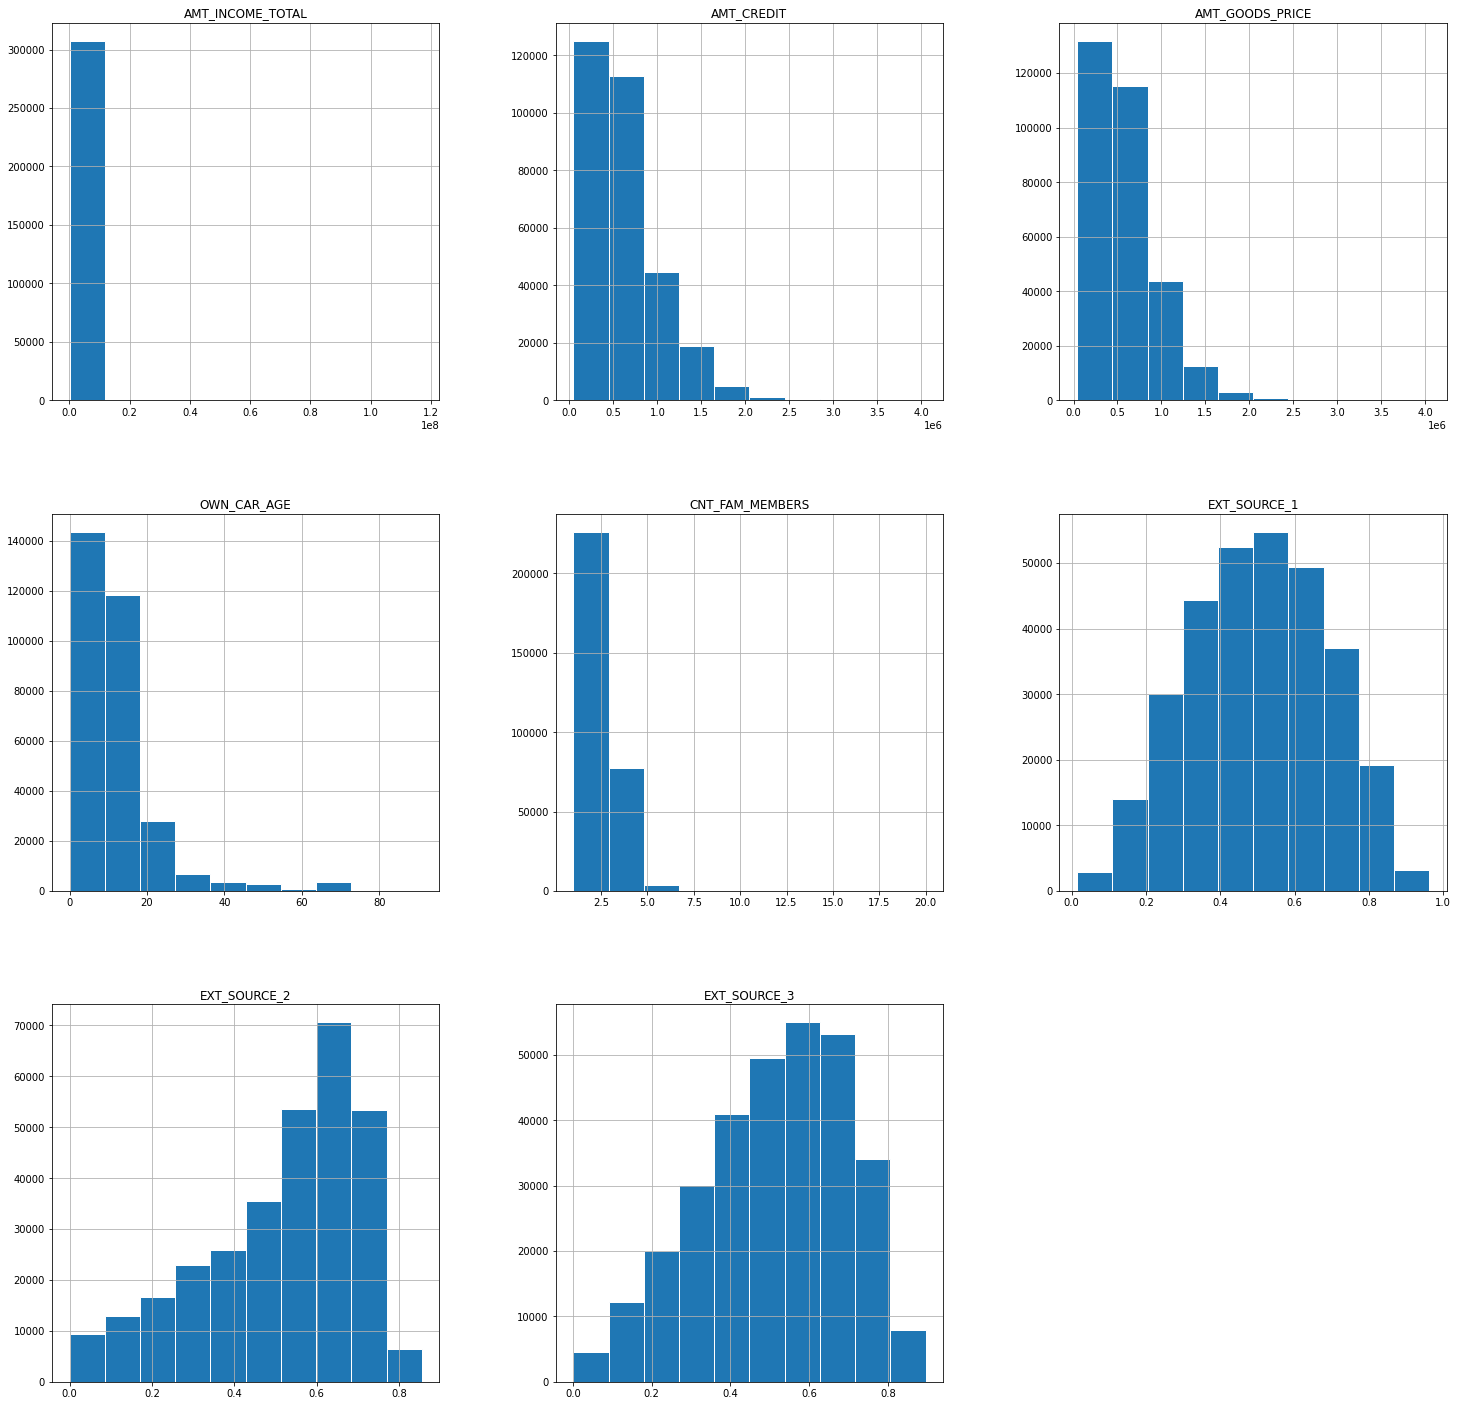

In [ ]:
## Checking Distribution of variables using Histogram
#data1.select_dtypes('float').hist(figsize=(25,25), ec='w')
data1[variables].hist(figsize=(25,25), ec='w')
plt.show()

In [ ]:
data1[variables].agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

AMT_INCOME_TOTAL    AMT_CREDIT  ...  EXT_SOURCE_2   EXT_SOURCE_3
count         3.075110e+05  3.075110e+05  ...  3.068510e+05  246546.000000
min           2.565000e+04  4.500000e+04  ...  8.173617e-08       0.000527
max           1.170000e+08  4.050000e+06  ...  8.549997e-01       0.896010
mad           6.622635e+04  3.165837e+05  ...  1.571668e-01       0.162636
mean          1.687979e+05  5.990260e+05  ...  5.143927e-01       0.510853
median        1.471500e+05  5.135310e+05  ...  5.659614e-01       0.535276
quantile      1.471500e+05  5.135310e+05  ...  5.659614e-01       0.535276
kurt          1.917866e+05  1.934041e+00  ... -2.691308e-01      -0.663463
skew          3.915597e+02  1.234778e+00  ... -7.935760e-01      -0.409390
var           5.622739e+10  1.619988e+11  ...  3.650398e-02       0.037964
std           2.371231e+05  4.024908e+05  ...  1.910602e-01       0.194844

[11 rows x 8 columns]

In [ ]:
##Relation Between Variables
def color_(value):
    if value <= -0.8 and value >=-1:
        color = '#991f00'
    elif value < -0.3 and -0.8 < value :
        color = '#ff3300'
    elif value < 0 and -0.3 <= value :
        color = '#ff9980'
    elif value == 1 :
        color = 'blue'
    elif value > 0 and value <= 0.3:
        color = '#75f075'
    elif value > 0.3 and value < 0.8:
        color = '#1de71d'
    else:
      color = '#0f8a0f'
    return 'color: %s' % color
color_(5)


'color: #0f8a0f'

In [ ]:
data1[variables].corr().style.applymap(color_)

        AMT_INCOME_TOTAL  AMT_CREDIT  ...  EXT_SOURCE_2  EXT_SOURCE_3
6               171000.0   1560726.0  ...      0.724000      0.492060
15              157500.0    299772.0  ...      0.346634      0.678568
21              202500.0   1132573.5  ...      0.233767      0.542445
28              270000.0    790830.0  ...      0.685011      0.524496
51              540000.0    675000.0  ...      0.713355      0.309275
...                  ...         ...  ...           ...           ...
307473           90000.0    258709.5  ...      0.264486      0.565608
307482          225000.0    500566.5  ...      0.737905      0.394495
307491           90000.0   1078200.0  ...      0.561158      0.716570
307494          270000.0    479700.0  ...      0.699727      0.511892
307497          180000.0    270126.0  ...      0.651306      0.524496

[41101 rows x 8 columns]
        TARGET
6            0
15           0
21           0
28           0
51           0
...        ...
307473       0
307482       0

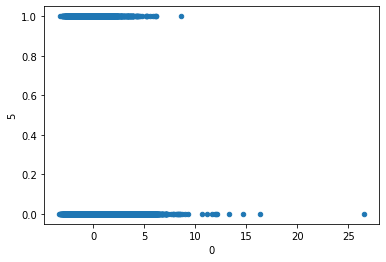

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scaler = StandardScaler()
variables_dim = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE','OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET'] 

subset = data1[variables_dim].dropna()

subset_x =subset.iloc[:,0:8]
subset_y =pd.DataFrame(subset.iloc[:,8:9])

print(subset_x)
print(subset_y)
scaler.fit(subset_x)

np_data_scaled = scaler.transform(subset_x)
pca = PCA(5)
pca.fit(np_data_scaled)
np_data_pca = pd.DataFrame(pca.transform(np_data_scaled))

# print(sum(pca.explained_variance_ratio_))
# print(pca.singular_values_)
subset_y.reset_index(drop=True, inplace=True)
print(np_data_pca)
result_pca_concat = pd.concat([np_data_pca, subset_y], axis=1 , ignore_index=True)
print("Y")
print(subset_y)
print("Concat")
print(result_pca_concat)
result_pca_concat.plot.scatter(x=0,y=5)


              0
0     -0.909193
1      0.778420
2      1.041208
3     -0.594368
4      0.239450
...         ...
41096  0.283307
41097 -0.224745
41098 -0.656111
41099 -0.657351
41100  0.147075

[41101 rows x 1 columns]


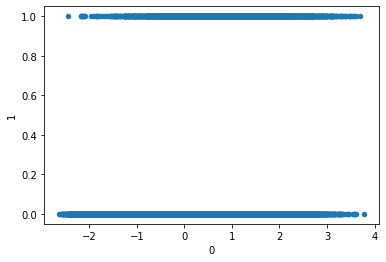

In [ ]:
clf = LinearDiscriminantAnalysis()
result_lda = clf.fit_transform(subset_x, subset_y)
result_lda = pd.DataFrame(result_lda)
print(result_lda)
result_lda_concat = pd.concat([result_lda, subset_y], axis=1 , ignore_index=True)



result_lda_concat.plot.scatter(x=0,y=1)


In [ ]:
result_pca_concat.sample(1000)

0         1         2         3         4  TARGET
414     0.333471  0.669441 -0.519846  0.607595 -0.443512     NaN
271293       NaN       NaN       NaN       NaN       NaN     0.0
27311   1.429010  0.688469 -1.298174  2.103076  0.942088     NaN
7279    0.858677 -0.779580 -0.578893 -0.549470 -0.880627     NaN
188893       NaN       NaN       NaN       NaN       NaN     0.0
...          ...       ...       ...       ...       ...     ...
96872        NaN       NaN       NaN       NaN       NaN     0.0
190789       NaN       NaN       NaN       NaN       NaN     0.0
23353  -0.146651  1.211604  1.859711  0.248057 -0.167994     NaN
40292   0.136490  0.862877  0.182498 -0.261283 -1.523221     NaN
161923       NaN       NaN       NaN       NaN       NaN     0.0

[1000 rows x 6 columns]

              0         1
0     -0.564232 -0.265684
1      0.483076 -0.265684
2      0.646158 -0.265684
3     -0.368856 -0.265684
4      0.148599 -0.265684
...         ...       ...
41096  0.175816 -0.265684
41097 -0.139474 -0.265684
41098 -0.407173 -0.265684
41099 -0.407942 -0.265684
41100  0.091273 -0.265684

[41101 rows x 2 columns]


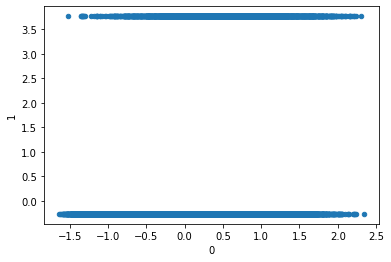

In [ ]:
from sklearn.cross_decomposition import CCA


cca = CCA(n_components=1)
cca.fit(subset_x, subset_y)
X_c, Y_c = cca.transform(subset_x,subset_y)
X_c = pd.DataFrame(X_c)
Y_c = pd.DataFrame(Y_c)
#print(Y_c.shape)
result_cca_concat = pd.concat([X_c, Y_c], axis=1 , ignore_index=True)


print(result_cca_concat)
result_cca_concat.plot.scatter(x=0,y=1)


OCCUPATION_TYPE
Accountants              AxesSubplot(0.125,0.125;0.775x0.755)
Cleaning staff           AxesSubplot(0.125,0.125;0.775x0.755)
Cooking staff            AxesSubplot(0.125,0.125;0.775x0.755)
Core staff               AxesSubplot(0.125,0.125;0.775x0.755)
Drivers                  AxesSubplot(0.125,0.125;0.775x0.755)
HR staff                 AxesSubplot(0.125,0.125;0.775x0.755)
High skill tech staff    AxesSubplot(0.125,0.125;0.775x0.755)
IT staff                 AxesSubplot(0.125,0.125;0.775x0.755)
Laborers                 AxesSubplot(0.125,0.125;0.775x0.755)
Low-skill Laborers       AxesSubplot(0.125,0.125;0.775x0.755)
Managers                 AxesSubplot(0.125,0.125;0.775x0.755)
Medicine staff           AxesSubplot(0.125,0.125;0.775x0.755)
Private service staff    AxesSubplot(0.125,0.125;0.775x0.755)
Realty agents            AxesSubplot(0.125,0.125;0.775x0.755)
Sales staff              AxesSubplot(0.125,0.125;0.775x0.755)
Secretaries              AxesSubplot(0.125,0.125;0.775

<Figure size 432x288 with 0 Axes>

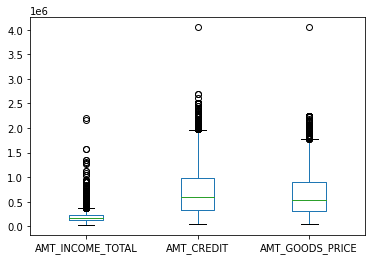

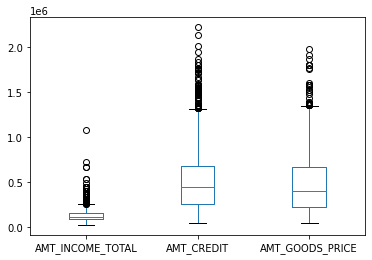

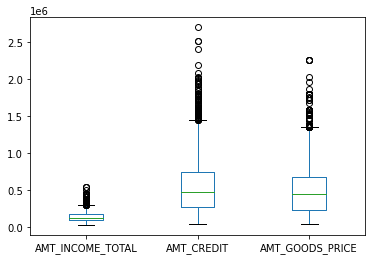

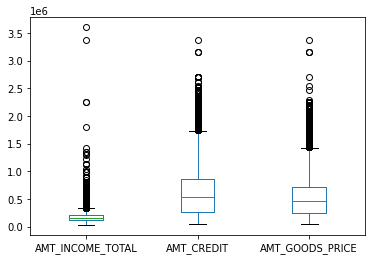

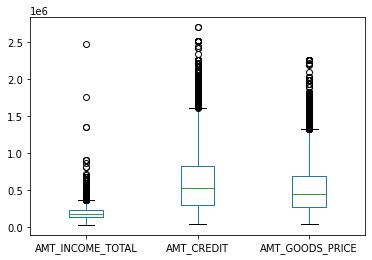

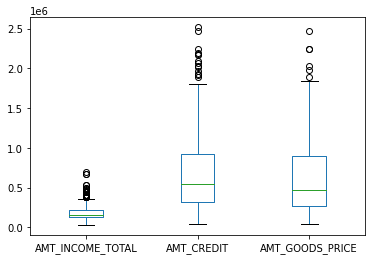

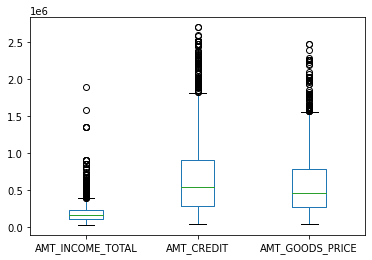

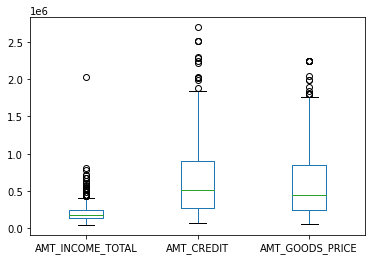

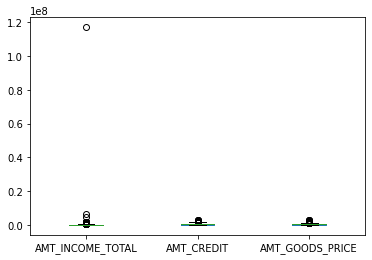

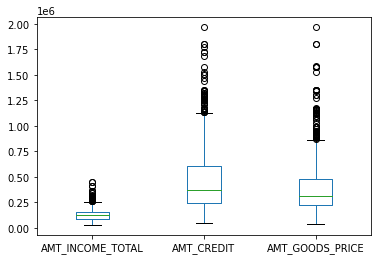

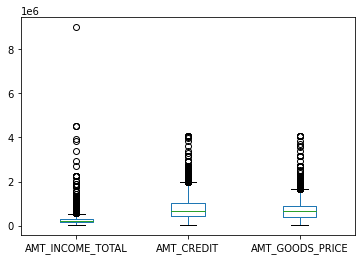

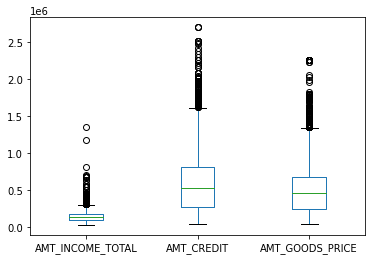

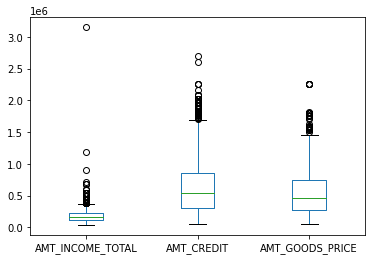

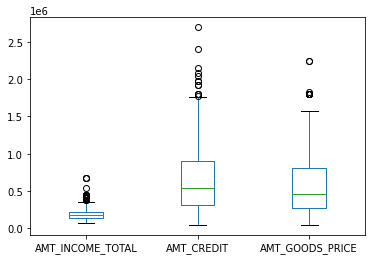

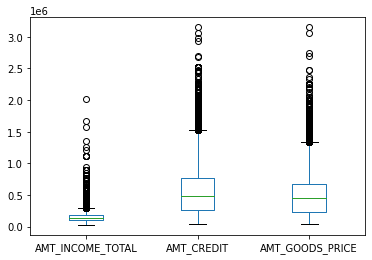

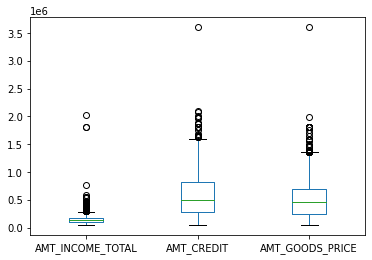

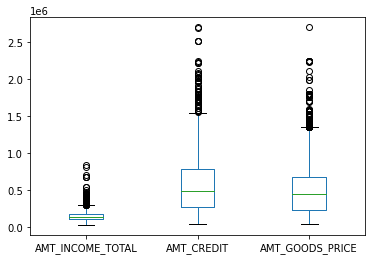

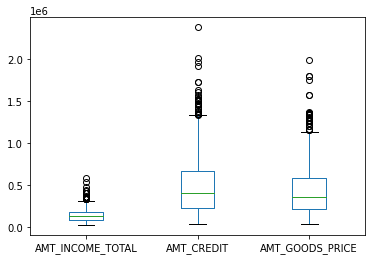

In [ ]:
variables = ['OCCUPATION_TYPE','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE']
#data1['OCCUPATION_TYPE']
#data1[variables].head()
plt.figure();
# titles = pd.unique(data1['OCCUPATION_TYPE'].dropna().sort_values())
# titles = list(np.repeat(titles, 3))
titles = [1,1,1]
#print(len(titles))

data1[variables].groupby('OCCUPATION_TYPE').plot(kind='box',sharex=True)


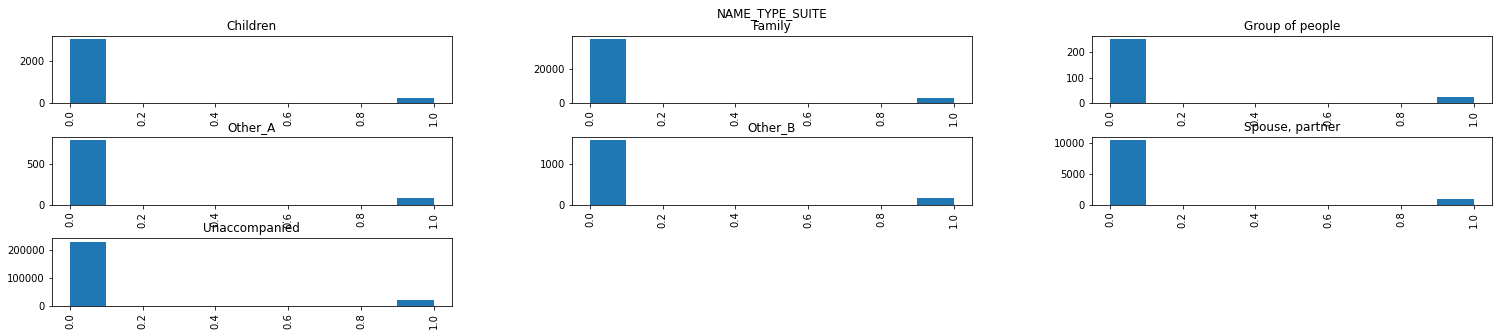

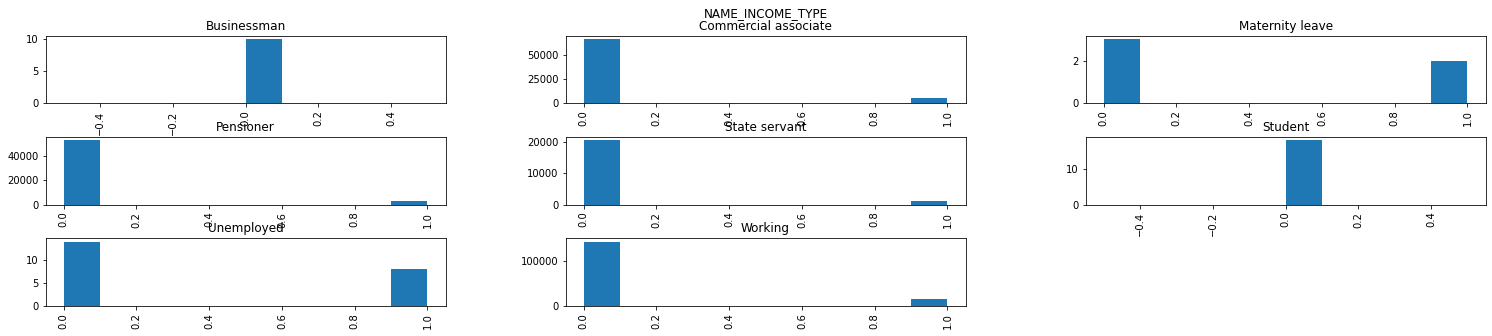

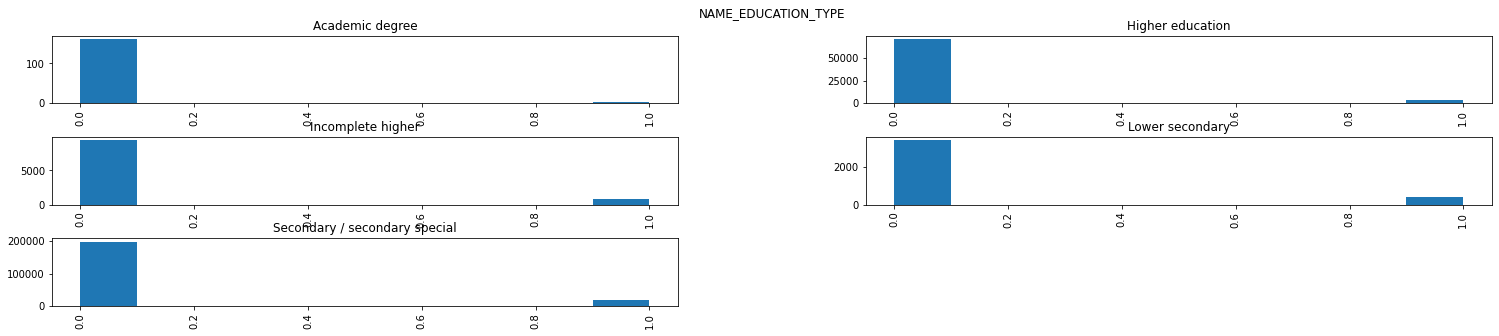

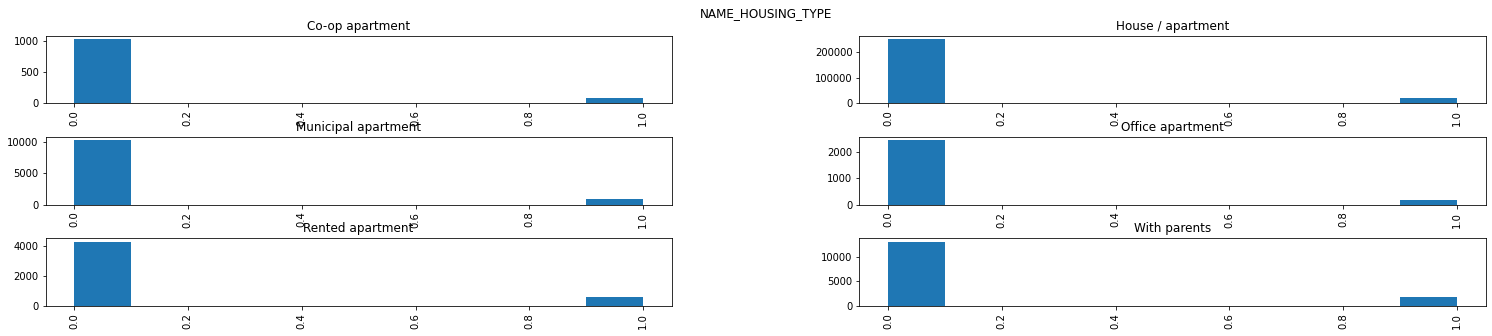

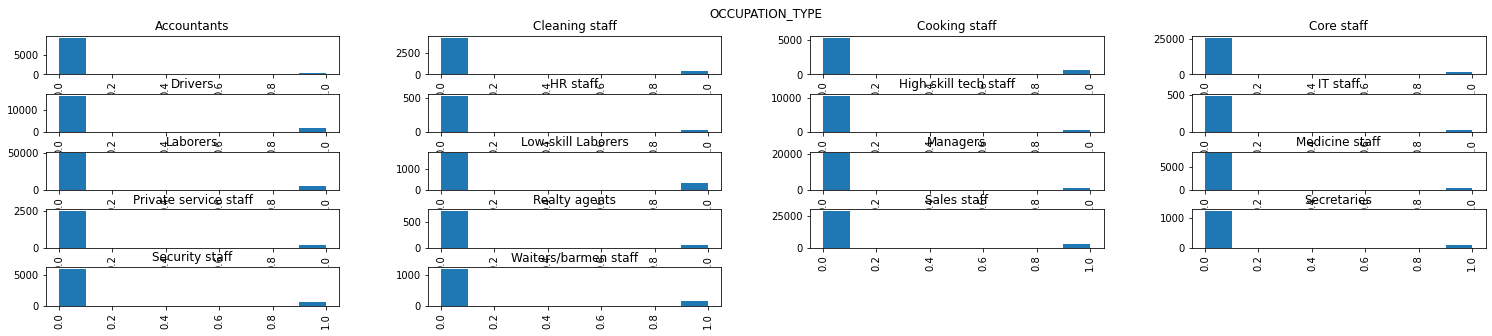

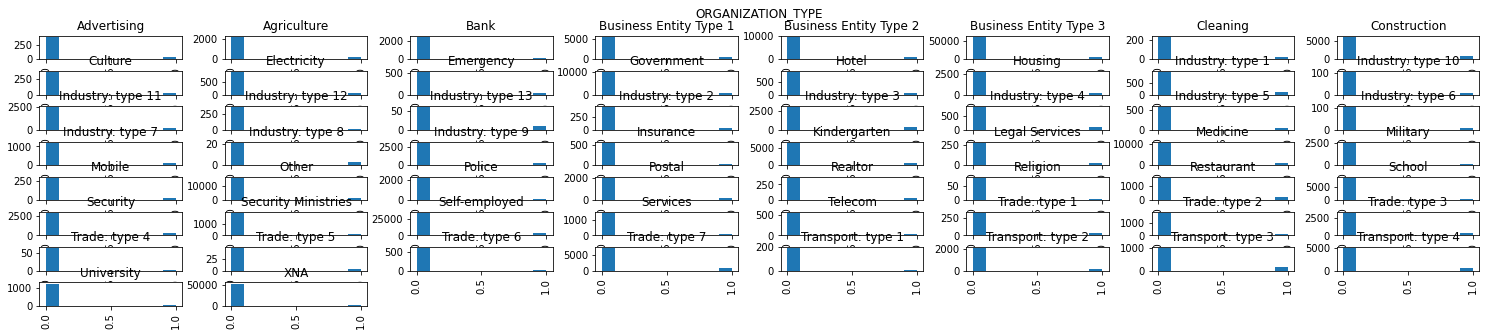

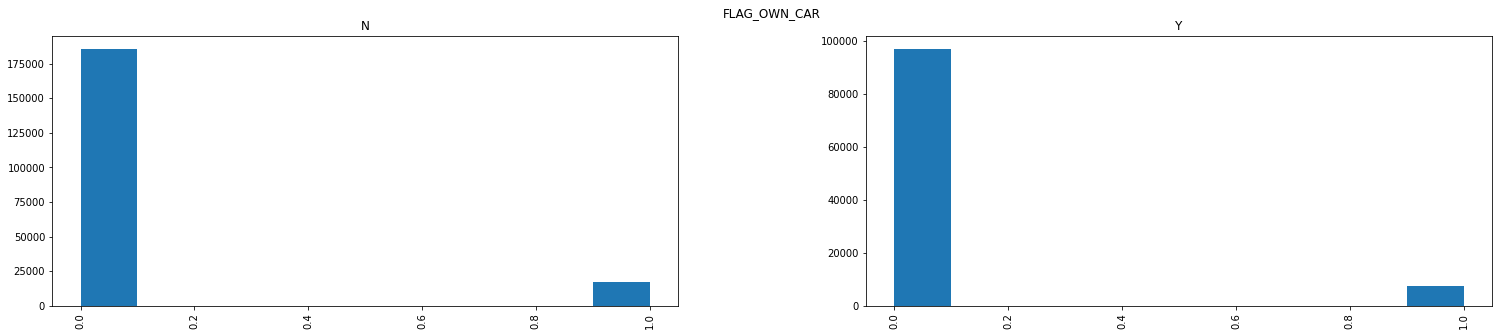

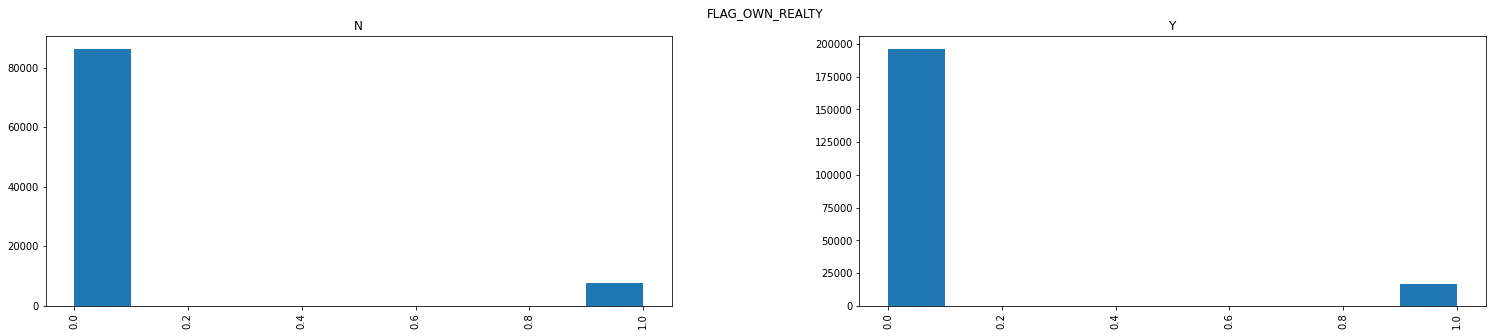

In [ ]:
vars = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for x in vars:
  data['TARGET'].hist(by=data[x],figsize=(25,5))
  plt.suptitle(x)
  plt.show()

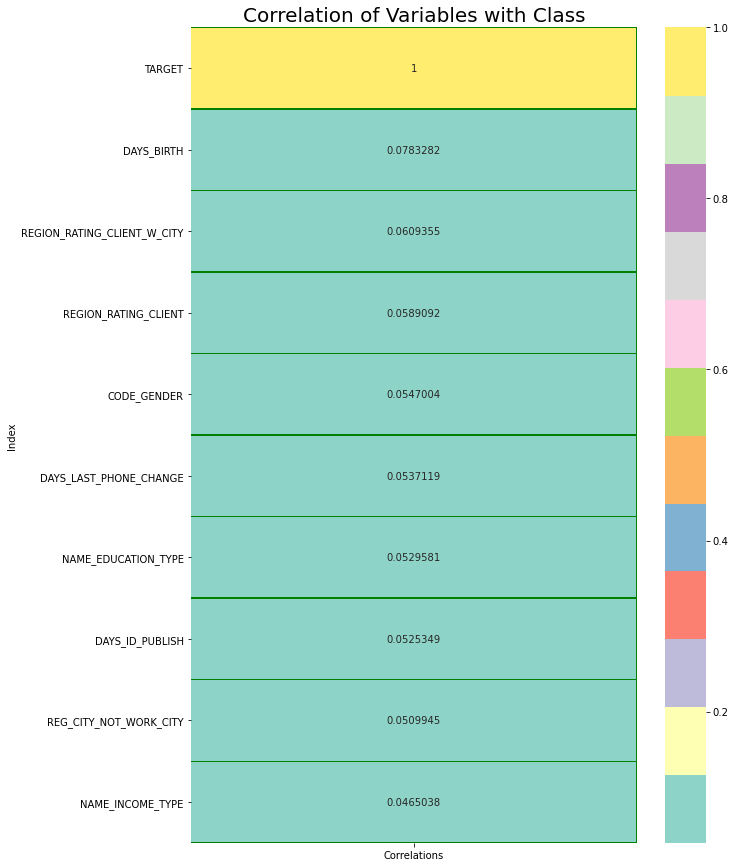

In [ ]:
# corr = data.corrwith(data['TARGET'],method='spearman').reset_index()

# corr.columns = ['Index','Correlations']
# corr = corr.set_index('Index')
# corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

# plt.figure(figsize=(10, 15))
# fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

# plt.title("Correlation of Variables with Class", fontsize=20)
# plt.show()

In [ ]:
missing(data)

In [ ]:
## Missing value Imputation : Mode
def mode_impute(df,col):
    return df[col].fillna(df[col].mode()[0])

In [ ]:
data['FONDKAPREMONT_MODE'] = mode_impute(data,'FONDKAPREMONT_MODE')
data['WALLSMATERIAL_MODE'] = mode_impute(data,'WALLSMATERIAL_MODE')
data['HOUSETYPE_MODE'] = mode_impute(data,'HOUSETYPE_MODE')
data['EMERGENCYSTATE_MODE'] = mode_impute(data,'EMERGENCYSTATE_MODE')
data['OCCUPATION_TYPE'] = mode_impute(data,'OCCUPATION_TYPE')
data['NAME_TYPE_SUITE'] = mode_impute(data,'NAME_TYPE_SUITE')

In [ ]:
missing(data.select_dtypes('object'))

In [ ]:
missing(data.select_dtypes('int'))

In [ ]:
missing(data.select_dtypes('float'))

In [ ]:
missing(data)

In [ ]:
data = data.fillna(data.mean())

In [ ]:
missing(data.select_dtypes('float'))

In [ ]:
data.select_dtypes('int')